In [1]:
import pandas as pd

df_wings = pd.read_excel('wing_length.xlsx', skiprows=3)
df_wings_length = df_wings[["length (x.1mm)"]]
df_wings_length

,length (x.1mm)
0,36
1,37
2,38
3,38
4,39
...,...
95,52
96,53
97,53
98,54


In [2]:
df_wings_frequencies = df_wings[["Bin", "Frequency"]]
df_wings_frequencies

,Bin,Frequency
0,36-38,2.0
1,38-40,4.0
2,40-42,10.0
3,42-44,15.0
4,44-46,19.0
...,...,...
95,NaN,NaN
96,NaN,NaN
97,NaN,NaN
98,NaN,NaN


In [3]:
import numpy as np

df_wings_frequencies = df_wings_frequencies.dropna()

In [4]:
df_wings_frequencies

,Bin,Frequency
0,36-38,2.0
1,38-40,4.0
2,40-42,10.0
3,42-44,15.0
4,44-46,19.0
5,46-48,19.0
6,48-50,15.0
7,50-52,10.0
8,52-54,4.0
9,54-56,2.0


In [5]:
import seaborn as sns
from matplotlib import pyplot as plt

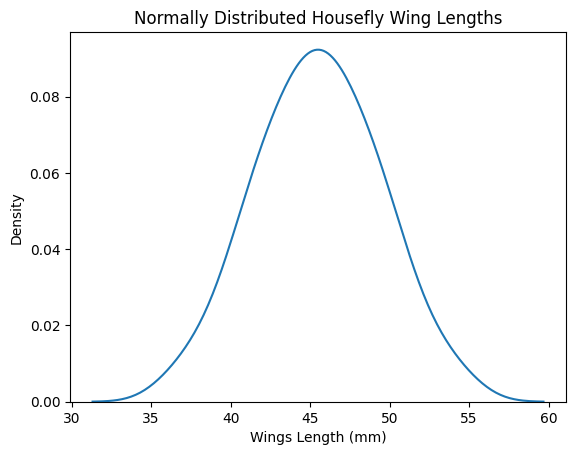

In [6]:
sns.kdeplot(data=df_wings_length, x="length (x.1mm)")
plt.title("Normally Distributed Housefly Wing Lengths")
plt.xlabel("Wings Length (mm)")
plt.show()

In [9]:
df_wings['length (x.1mm)'].describe()

count    100.000000
mean      45.500000
std        3.919647
min       36.000000
25%       43.000000
50%       45.500000
75%       48.000000
max       55.000000
Name: length (x.1mm), dtype: float64

In [12]:
# A function that stores the standard deviaton and mean of the wings length

stdev = df_wings_length.std()
mean = df_wings_length.mean()

In [21]:
def get_deviations(n=1):
    """Returns the deviation n places above or below the mean"""

    below = mean - (n * stdev)
    above = mean + (n * stdev)

    return round(below.item(), 1), round(above.item(), 1)

In [33]:
one_dev = get_deviations()
two_devs = get_deviations(2)
three_devs = get_deviations(3)

three_devs

(33.7, 57.3)

In [32]:
cdf_three_devs_above = df_wings_length[df_wings_length['length (x.1mm)'] <= one_dev[1]].count()
cdf_three_devs_below = df_wings_length[df_wings_length['length (x.1mm)'] <= one_dev[0]].count()

cdf_three_devs_above - cdf_three_devs_below

length (x.1mm)    68
dtype: int64